In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from pypalettes import get_hex
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [3]:
data = sns.load_dataset('iris')
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [4]:
data.shape

(150, 5)

# Describe

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe(include=['O'])

,species
count,150
unique,3
top,setosa
freq,50


In [8]:
data.value_counts(subset=['species'])

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# Missing Values

In [9]:
from common import null_table

In [10]:
null_table_train = null_table(data)

null_table_train.sort_values(
    by='Percentage', 
    ascending=False
)

,Columns,Null Count,Percentage
0,sepal_length,0,0.0
1,sepal_width,0,0.0
2,petal_length,0,0.0
3,petal_width,0,0.0
4,species,0,0.0


# Correlation

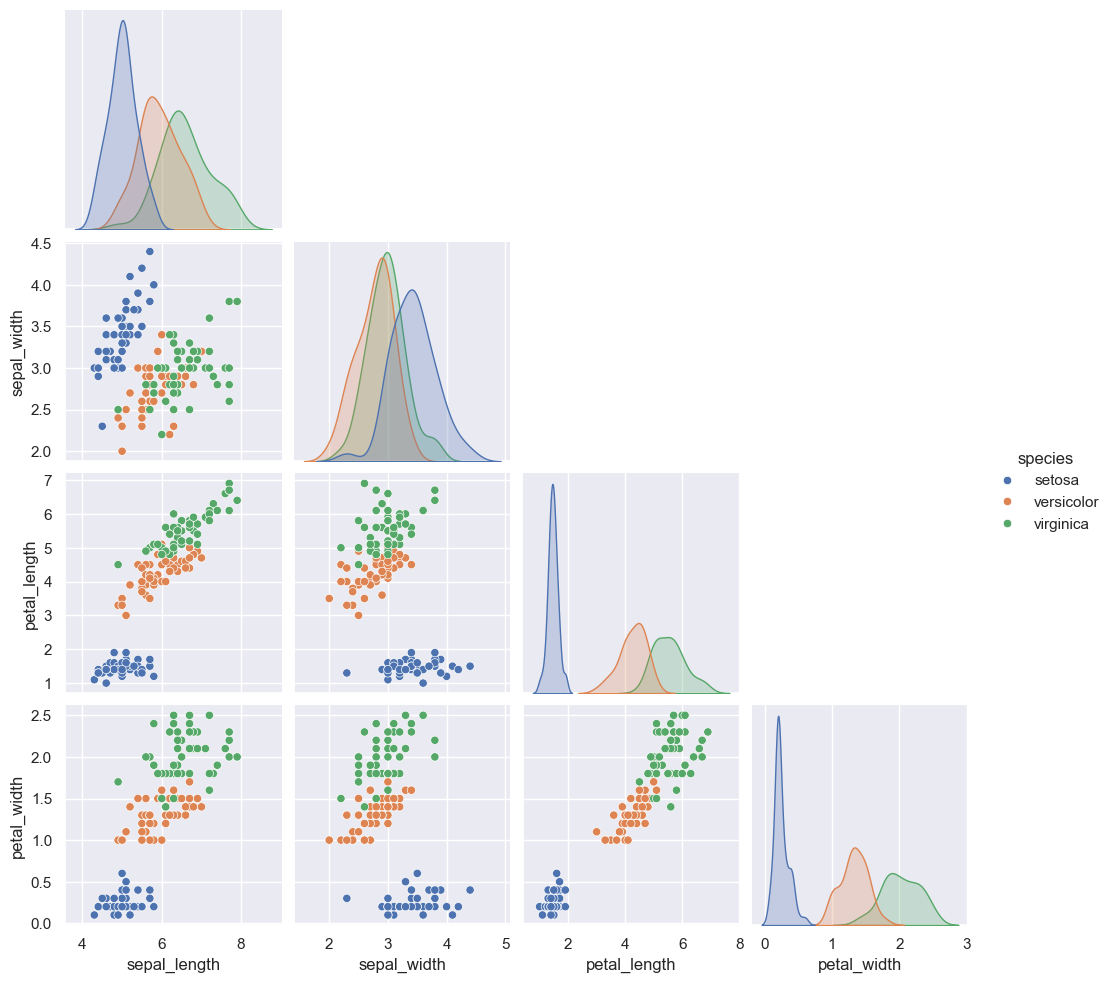

In [11]:
sns.pairplot(data, hue='species', corner=True);

In [12]:
from common import corr_among_numerics

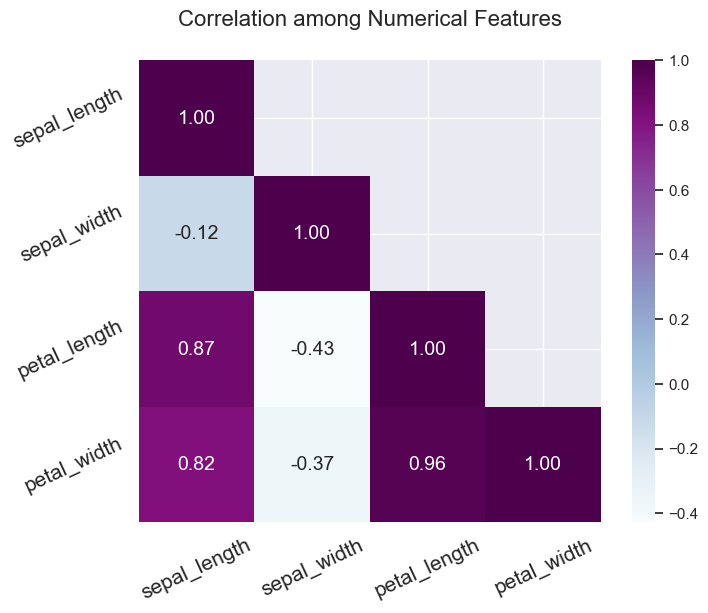

In [13]:
corr_among_numerics(data)

# Skew Handling

In [14]:
data.skew(numeric_only=True)

sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

Skew is not that high.

# Group Differences

In [15]:
from common import draw_box_plots

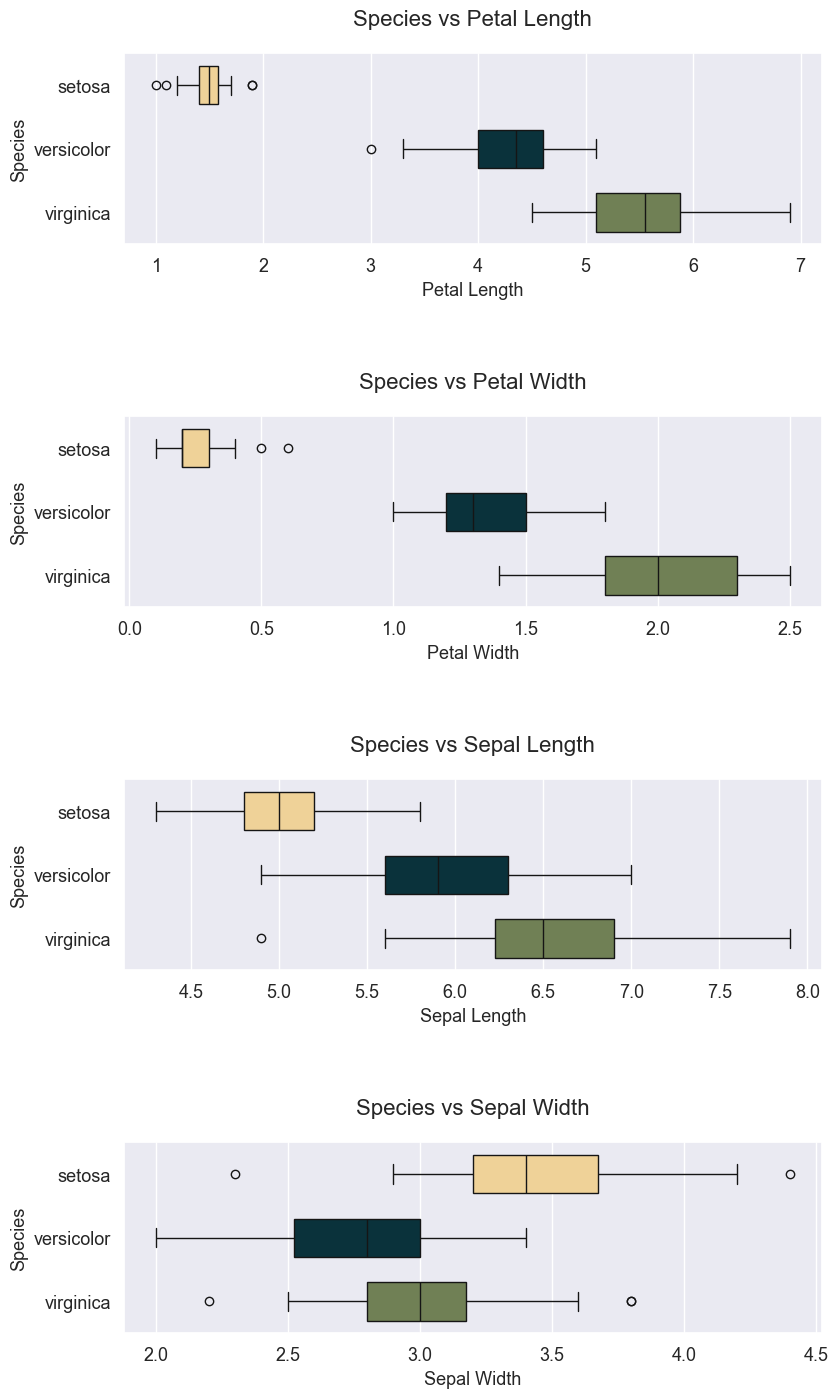

In [16]:
draw_box_plots(data, 'species', 9, 4)

# Training

21:39:19 | SUCCESS  | Start!
21:39:19 | DEBUG    | Getting Dataset!
21:39:19 | INFO     | Go Forth and Grid Search!
Fitting 5 folds for each of 40 candidates, totalling 200 fits
21:39:26 | INFO     | Best score        : 98.33%
21:39:26 | INFO     | Best parameters   : 
{'max_depth': 5, 'min_samples_split': 50, 'n_estimators': 50}
21:39:26 | INFO     | Predicting on Test Set
21:39:26 | INFO     | Evaluation on Test Set
21:39:26 | INFO     | Accuracy Score : 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



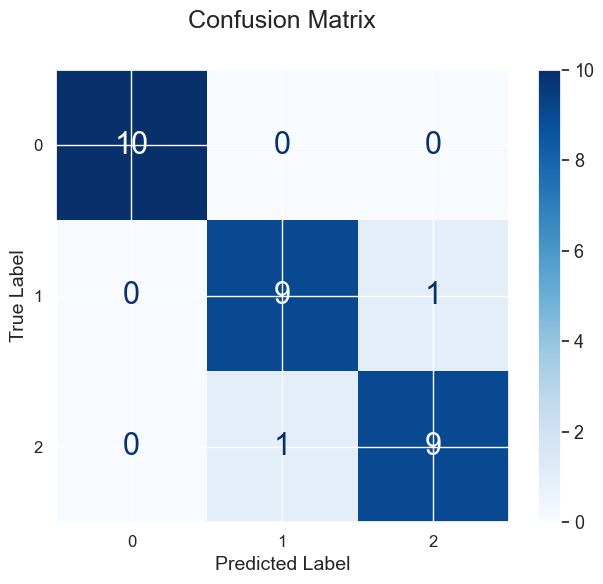

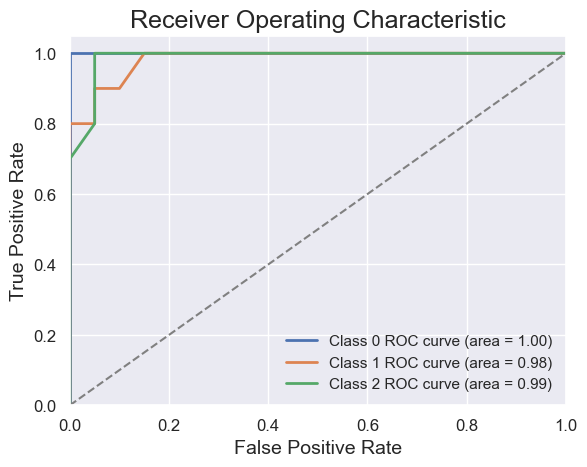

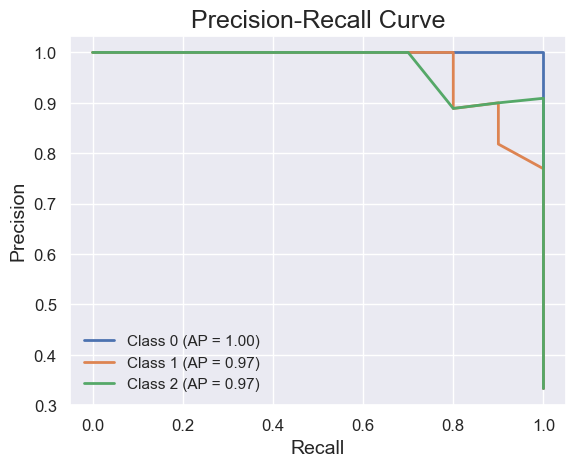

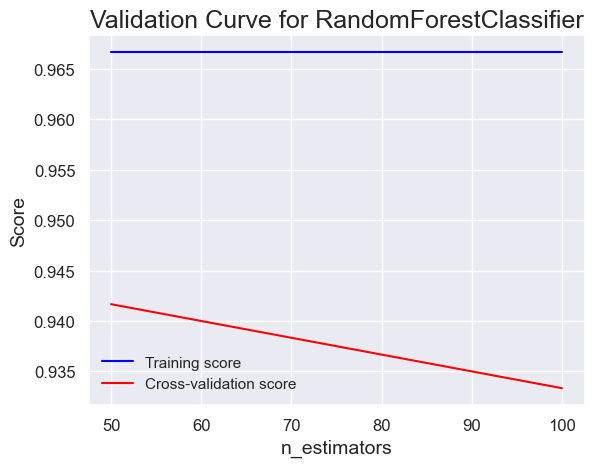

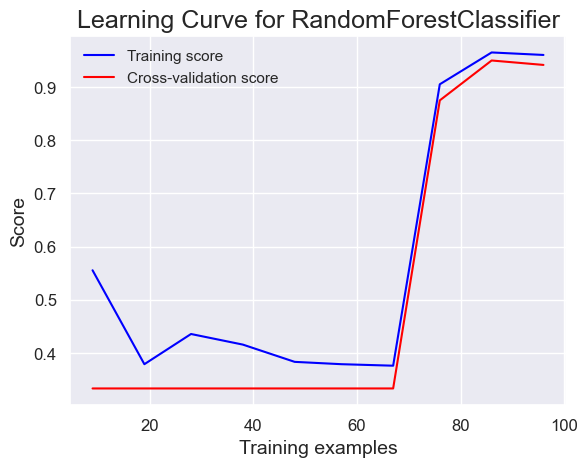

21:39:32 | SUCCESS  | Done!


RandomForestClassifier(max_depth=5, min_samples_split=50, n_estimators=50)

In [21]:
from iris_train import main
best_model = main()